In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
import random
import math

# libreria locale
import my_lib_modificata as my

In [2]:
# FAR FUNZIONARE IL FIT
# variabili da associare alla funzione fit
# m, sigma_m, c, sigma_c, cov_mc, rho_mc = my.lin_fit...
# cose da inserire dentro la funzione fit
# array x, array y, sigma_y, xlabel, ylabel, title, xmin, xmax, ymin, ymax, plot=True

In [3]:
# PARAMETRI DELLA RETTA DI CALIBRAZIONE
m =  173.7133
sigma_m =  0.1915
c =  -0.0152
sigma_c = 0.0011
cov = -0.0002
rho = -0.9585

<AxesSubplot: xlabel='t'>

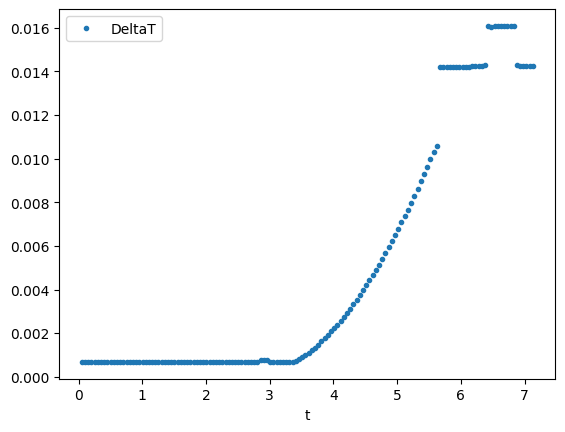

In [4]:
# IMPORTO I TEMPI E VEDO DOVE TAGLIARE
df = pd.read_csv('tang3_1.txt', header=1, sep='\t')
df = df.rename(columns={"Tempo ( s )":"t", "Tempo trascorso ( s )":"DeltaT"})
df.plot(x="t", y="DeltaT", linestyle="None", marker=".")

In [5]:
# TAGLIO I TEMPI INUTILI
df_new = df.drop(df[df.t <3.6 ].index | df[df.t > 5.5].index)
df_new

/var/folders/sh/g1b60r3n5jxcwjkdwqkp_3xw0000gn/T/ipykernel_8724/1325997041.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df_new = df.drop(df[df.t <3.6 ].index | df[df.t > 5.5].index)


,t,DeltaT
71,3.6083,0.001098
72,3.6585,0.001213
73,3.7087,0.001336
74,3.7589,0.001467
75,3.8092,0.001616
76,3.8594,0.001760
77,3.9097,0.001913
78,3.9599,0.002079
79,4.0102,0.002237
80,4.0604,0.002367


In [6]:
# USO DELLA RETTA DI CALIBRAZIONE
dTi = df_new.DeltaT.to_numpy()
sigma_dTi = np.repeat(0.0000003, len(dTi))

xi = m*dTi + c
sigma_xi = np.sqrt( (dTi**2)*(sigma_m**2) + (m**2)*(sigma_dTi**2) + sigma_c**2 + 2*dTi*cov )

dTi, xi, sigma_xi

(array([0.001098, 0.001213, 0.001336, 0.001467, 0.001616, 0.00176 ,
        0.001913, 0.002079, 0.002237, 0.002367, 0.002541, 0.002724,
        0.002911, 0.003119, 0.00332 , 0.003527, 0.003739, 0.003959,
        0.004186, 0.00442 , 0.004656, 0.004894, 0.005144, 0.005403,
        0.005666, 0.005936, 0.006213, 0.006495, 0.006783, 0.007077,
        0.007358, 0.007665, 0.00798 , 0.008307, 0.00863 , 0.00896 ,
        0.009296, 0.009637]),
 array([0.1755372 , 0.19551423, 0.21688097, 0.23963741, 0.26552069,
        0.29053541, 0.31711354, 0.34594995, 0.37339665, 0.39597938,
        0.4262055 , 0.45799503, 0.49047942, 0.52661178, 0.56152816,
        0.59748681, 0.63431403, 0.67253095, 0.71196387, 0.75261279,
        0.79360912, 0.83495289, 0.87838122, 0.92337296, 0.96905956,
        1.01596215, 1.06408073, 1.11306788, 1.16309731, 1.21416902,
        1.26298246, 1.31631244, 1.37103213, 1.42783638, 1.48394578,
        1.54127117, 1.59963884, 1.65887507]),
 array([0.00090428, 0.00088401, 0.000862

In [7]:
# X, SIGMA_X, Y, SIGMA_Y
t = df_new.t.to_numpy()

v = np.zeros(shape=len(xi)-1)
t_new = np.zeros(shape=len(v))
sigma_v = np.zeros(shape=len(v))

sigma_x = np.zeros(shape=len(xi)-1)
for i in range (0, len(xi)-2):
    sigma_x[i]=np.sqrt( ((sigma_xi[i])**2) + ((sigma_xi[i+1])**2) )

for i in range (0, len(xi)-1, 2):
    v[i]=(xi[i+1]-xi[i])/(t[i+1]-t[i])
    sigma_v[i]=np.sqrt(((1/(t[i+1]-t[i]))**2)*(sigma_dTi[i]**2)+(((xi[i+1]-xi[i])/((t[i+1]-t[i])**2))**2)*(sigma_x[i]**2)+(2*sigma_x[i]*sigma_dTi[i]))
    t_new[i] = t[i]
    
v = np.delete(v, np.argwhere(v == 0))
t_new = np.delete(t_new, np.argwhere(t_new == 0))
sigma_v = np.delete(sigma_v, np.argwhere(sigma_v == 0))
sigma_t_new = np.repeat(0.0000003, len(t_new))

In [8]:
# STIMA DI M COME DELTA_Y / DELTA_X
m0 = (v.max()-v.min())/(t.max()-t.min())
m0

# STIMA DI M CON FIT PER SIGMA_X = 0
# m0, sigma_m0, c0, sigma_c0, cov0, rho0 = my.lin_fit(t, v, sigma_v, "Tempo", "Velocità", t.min(), t.max(), v.min(), v.max(), plot=True)

0.4174488960087627

m         =  0.4278
sigma(m)  =  0.0023
c         =  -1.1434
sigma(c)  =  0.0122
cov(m, c) =  -0.0
rho(m, c) =  -1.0


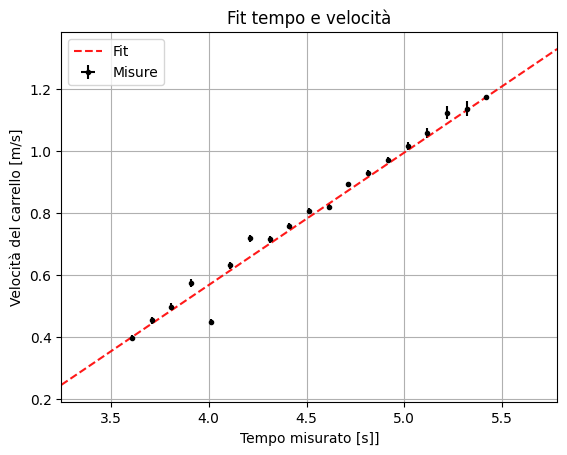

In [9]:
# NUOVE INCERTEZZE E FIT FINALE
# sigma_v_new = np.sqrt(sigma_v**2+(m0*sigma_t)**2)
sigma_v_new = sigma_v # tocca vedere se le incertezze sono comparabili o no e scegliere la riga di codice da usare
m, sigma_m, c, sigma_c, cov, rho = my.lin_fit(t_new, v, sigma_v_new, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità", t_new.min(), t_new.max(), v.min(), v.max(), plot=True)

In [10]:
# STUDIO DEI RESIDUI
v_atteso = m*t_new + c
d = v - v_atteso
d_norm = d / sigma_v_new

Text(0.5, 0, 'Tempo misurato [s]')

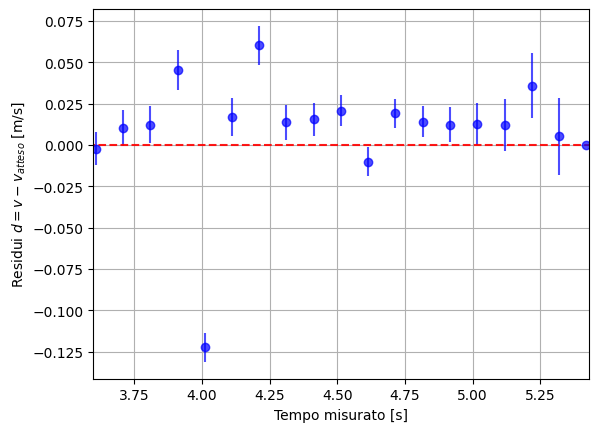

In [11]:
# RESIDUI
plt.grid()
plt.errorbar(t_new, d, sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

Text(0.5, 0, 'Tempo misurato [s]')

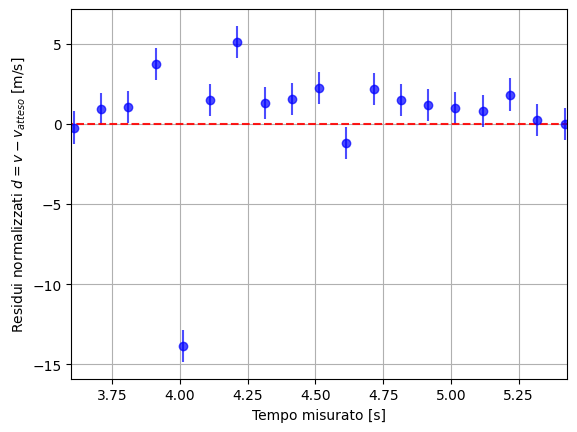

In [12]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new, d_norm, sigma_v_new/sigma_v_new, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new.min()-0.5, t_new.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new.min()-0.01, t_new.max()+0.01)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

In [13]:
# RIMUOVO I PUNTI A CAZZO
t_new1 = np.delete(t_new, np.argwhere((d_norm.astype(int) < -2) | (d_norm.astype(int) > 2)))
v1 = np.delete(v, np.argwhere((d_norm.astype(int) < -2) | (d_norm.astype(int) > 2)))
sigma_v_new1 = np.delete(sigma_v_new, np.argwhere((d_norm.astype(int) < -2) | (d_norm.astype(int) > 2)))

m         =  0.4194
sigma(m)  =  0.0026
c         =  -1.0978
sigma(c)  =  0.0142
cov(m, c) =  -0.0
rho(m, c) =  -1.0


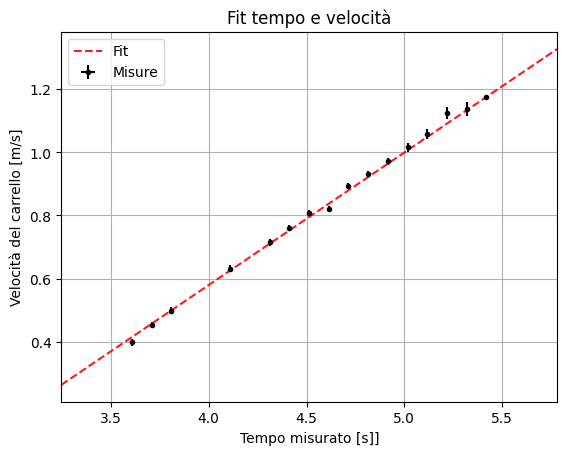

In [14]:
# FIT A POSTERIORI
m1, sigma_m1, c1, sigma_c1, cov1, rho1 = my.lin_fit(t_new1, v1, sigma_v_new1, "Tempo misurato [s]]", "Velocità del carrello [m/s]", "Fit tempo e velocità", t_new1.min(), t_new1.max(), v1.min(), v1.max(), plot=True)

In [15]:
# STUDIO DEI RESIDUI
v_atteso1 = m1*t_new1 + c1
d1 = v1 - v_atteso1
d_norm1 = d1 / sigma_v_new1

Text(0.5, 0, 'Tempo misurato [s]')

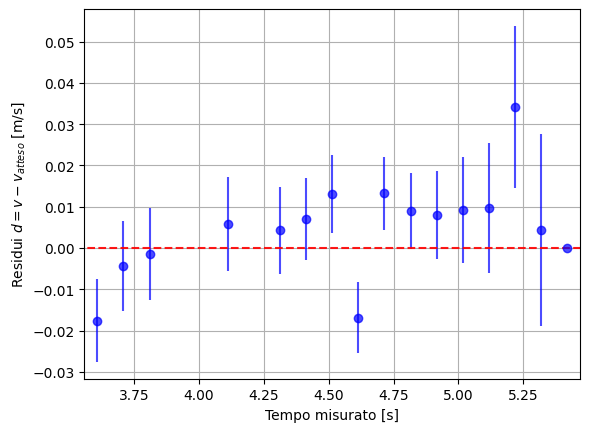

In [16]:
# RESIDUI
plt.grid()
plt.errorbar(t_new1, d1, sigma_v_new1, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new1.min()-0.5, t_new1.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new1.min()-0.05, t_new1.max()+0.05)
plt.ylabel("Residui $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

Text(0.5, 0, 'Tempo misurato [s]')

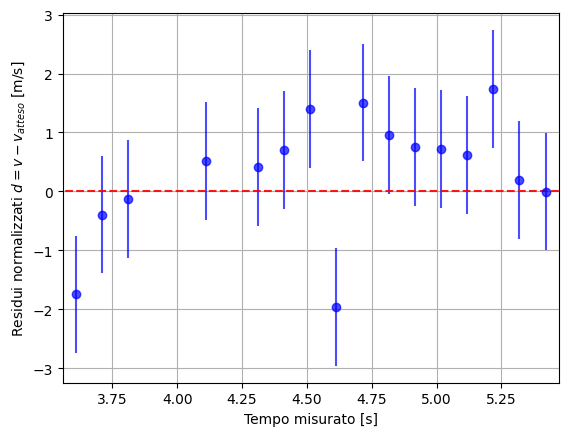

In [17]:
# RESIDUI NORMALIZZATI
plt.grid()
plt.errorbar(t_new1, d_norm1, sigma_v_new1/sigma_v_new1, marker='o',linestyle="", color="blue", alpha=0.7)
plt.plot([t_new1.min()-0.5, t_new1.max()+0.5], [0,0], linestyle="--", color="red", alpha=0.9)
plt.xlim(t_new1.min()-0.05, t_new1.max()+0.05)
plt.ylabel("Residui normalizzati $d=v-v_{atteso}$ [m/s]")
plt.xlabel("Tempo misurato [s]")

In [18]:
# CALCOLO DI A
a = m
sigma_a = sigma_m
print('Accelerazione: ', a)
print('Incertezza: ', sigma_a)

Accelerazione:  0.4277930436484849
Incertezza:  0.002256309172964585
